In [14]:
from spinup.utils.test_policy import load_policy_and_env, run_policy
from gym_space.envs.hover_1d import SpaceshipHover1DContinuousEnv
# output_dir = "ddpg_step9_1x6_small_inertia"
# output_dir = "ddpg_step18_1x6_small_inertia"
output_dir = "ddpg_step18_1x6_small_inertia2"
# step_size = 9
step_size = 18
RADIUS = 10
MAX_HEIGHT = 3
env = SpaceshipHover1DContinuousEnv(
    step_size=step_size,
    planet_radius=RADIUS,
    reward_max_height=MAX_HEIGHT
)
output_path = f"/home/kajetan/git/spinningup/data/ddpg/{output_dir}"

/home/kajetan/git/gym-space/.venv/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [15]:
_, get_action = load_policy_and_env(output_path)
run_policy(env, get_action)



Loading from /home/kajetan/git/spinningup/data/ddpg/ddpg_step18_1x6_small_inertia2/pyt_save/model.pt.


Logging data to /tmp/experiments/1621592707/progress.txt
Episode 0 	 EpRet 79.667 	 EpLen 300
Episode 1 	 EpRet 100.000 	 EpLen 300
Episode 2 	 EpRet 88.000 	 EpLen 300
Episode 3 	 EpRet 82.333 	 EpLen 300
Episode 4 	 EpRet 100.000 	 EpLen 300
Episode 5 	 EpRet 100.000 	 EpLen 300
Episode 6 	 EpRet 79.000 	 EpLen 300
Episode 7 	 EpRet 68.333 	 EpLen 300
Episode 8 	 EpRet 78.000 	 EpLen 300
Episode 9 	 EpRet 100.000 	 EpLen 300
Episode 10 	 EpRet 81.000 	 EpLen 300
Episode 11 	 EpRet 100.000 	 EpLen 300


KeyboardInterrupt: 

In [16]:
import torch
import numpy as np
ac = torch.load(f"{output_path}/pyt_save/model.pt")


In [17]:
POS_LINSPACE = torch.linspace(RADIUS, RADIUS + 1.5 * MAX_HEIGHT, 100)
MAX_ABS_VEL = 1
VEL_LINSPACE = np.linspace(-MAX_ABS_VEL, MAX_ABS_VEL, 100)
import matplotlib.pyplot as plt
def imshow(arr):
    plt.imshow(
    arr,
    origin='lower',
    extent=(-MAX_ABS_VEL, MAX_ABS_VEL, 0, 1.5 * MAX_HEIGHT),
    aspect='auto',
    )
    plt.colorbar()
    plt.xlabel("velocity")
    plt.ylabel("position")

In [18]:
obs = torch.zeros((100, 6))
obs[:, 1] = POS_LINSPACE
obs[:, 2] = 1.5 * np.pi
def q_vals_from_act(act):
    q_vals = np.empty((100, 100))
    for i, velocity in enumerate(VEL_LINSPACE):
        obs[:, 4] = velocity
        q_vals[:, i] = ac.q.forward(obs, act).detach().numpy()
    return q_vals

In [19]:
no_thrust_act = torch.zeros(100, 2)
no_thrust_act[:, 0] = -1
q_no_thrust = q_vals_from_act(no_thrust_act)
# imshow(q_no_thrust)

In [20]:
full_thrust_act = torch.zeros(100, 2)
full_thrust_act[:, 0] = 1
q_full_thrust = q_vals_from_act(full_thrust_act)
# imshow(q_full_thrust)

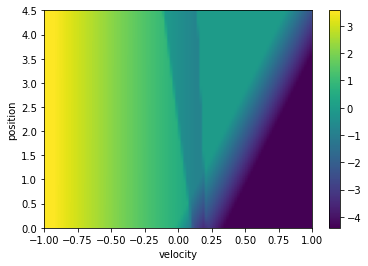

In [21]:
imshow(q_full_thrust - q_no_thrust)

In [22]:
# half_thrust_act = torch.zeros(100, 2)
# q_half_thrust = q_vals_from_act(half_thrust_act)
# imshow((q_no_thrust + q_half_thrust + q_full_thrust) / 3)

In [23]:
def pi_actions():
    ret = np.empty((100, 100))
    for i, velocity in enumerate(VEL_LINSPACE):
        obs[:, 4] = velocity
        ret[:, i] = ac.pi.forward(obs).detach().numpy()[:, 0]
    return (ret + 1) / 2

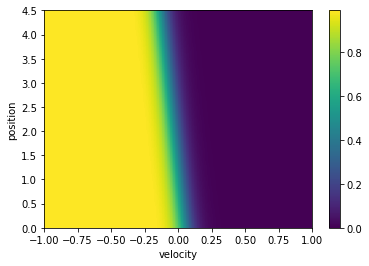

In [24]:
pi_act = pi_actions()
imshow(pi_act)

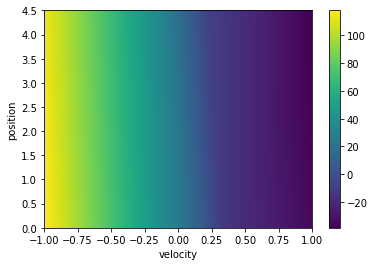

In [12]:
def on_policy_q():
    q_vals = np.empty((100, 100))
    for i, velocity in enumerate(VEL_LINSPACE):
        obs[:, 4] = velocity
        q_vals[:, i] = ac.q.forward(obs, ac.pi.forward(obs)).detach().numpy()
    return q_vals

on_pi_q = on_policy_q()
imshow(on_pi_q)